# **Introduction**

**Random forest** is a supervised learning algorithm which is used for both *classification* as well as *regression*. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an *ensemble method* which is better than a single decision tree because *it reduces the over-fitting* by averaging the result.

# **Working of Random Forest Algorithm**

Step 1 − First, start with the selection of random samples from a given dataset.



Step 2 − Next, this algorithm will construct a decision tree for every sample. Then it will get the prediction result from every decision tree.



Step 3 − In this step, voting will be performed for every predicted result.



Step 4 − At last, select the most voted prediction result as the final prediction result.

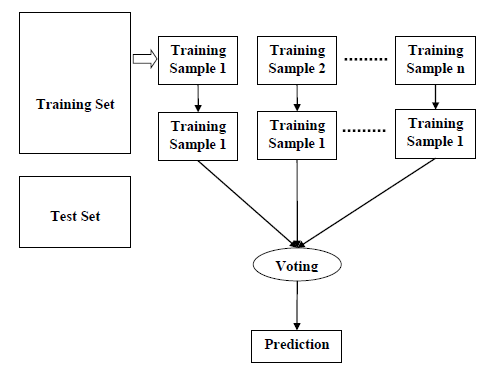

# Bagging

   Bagging is also known as Bootstrap Aggregation, serves as the ensembling technique in the Random Forest algortihm

In [1]:
import pandas as pd
import numpy as np

In [2]:
Diabetes = pd.read_csv('Diabetes_RF.csv')
Diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [3]:
Diabetes.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [4]:
colnames = list(Diabetes.columns)
colnames

[' Number of times pregnant',
 ' Plasma glucose concentration',
 ' Diastolic blood pressure',
 ' Triceps skin fold thickness',
 ' 2-Hour serum insulin',
 ' Body mass index',
 ' Diabetes pedigree function',
 ' Age (years)',
 ' Class variable']

In [5]:
predictors = colnames[:8]
predictors

[' Number of times pregnant',
 ' Plasma glucose concentration',
 ' Diastolic blood pressure',
 ' Triceps skin fold thickness',
 ' 2-Hour serum insulin',
 ' Body mass index',
 ' Diabetes pedigree function',
 ' Age (years)']

In [6]:
target = colnames[8]
target

' Class variable'

In [7]:
X = Diabetes[predictors]
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
Y = Diabetes[target]
Y

,Class variable
0,YES
1,NO
2,YES
3,NO
4,YES
...,...
763,NO
764,NO
765,NO
766,YES


In [ ]:
type(Y)

pandas.core.series.Series

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
help(RandomForestClassifier)

In [10]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=50,criterion="entropy")

In [11]:
np.shape(Diabetes)

(768, 9)

In [12]:
rf.fit(X,Y)

RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=3,
                       oob_score=True)

In [13]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=560833903),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1088452227),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=633855468),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1114773326),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1390709426),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=2125378680),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=628163101),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=771571200),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
          

In [14]:
len(list(rf.estimators_))

50

In [15]:
rf.classes_

array(['NO', 'YES'], dtype=object)

In [16]:
len(list(rf.classes_))

2

In [17]:
rf.n_classes_

2

In [18]:
rf.n_outputs_

1

In [19]:
rf.oob_score_

0.7447916666666666

In [20]:
rf.predict(X)

array(['YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'

In [21]:
Diabetes['rf_pred'] = rf.predict(X)
Diabetes['rf_pred']

,rf_pred
0,YES
1,NO
2,YES
3,NO
4,YES
...,...
763,NO
764,NO
765,NO
766,YES


In [22]:
cols = ['rf_pred',' Class variable']
cols

['rf_pred', ' Class variable']

In [24]:
Diabetes[" Class variable"]

,Class variable
0,YES
1,NO
2,YES
3,NO
4,YES
...,...
763,NO
764,NO
765,NO
766,YES


In [25]:
Diabetes[cols].head()

,rf_pred,Class variable
0,YES,YES
1,NO,NO
2,YES,YES
3,NO,NO
4,YES,YES


In [26]:
Diabetes[cols]

,rf_pred,Class variable
0,YES,YES
1,NO,NO
2,YES,YES
3,NO,NO
4,YES,YES
...,...,...
763,NO,NO
764,NO,NO
765,NO,NO
766,YES,YES


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:
confusion_matrix(Diabetes[' Class variable'],Diabetes['rf_pred'])

array([[500,   0],
       [  0, 268]])

In [30]:
accuracy_score(Diabetes[' Class variable'],Diabetes['rf_pred']) *100

100.0

# **Task**

**EX -- Apply Iris Dataset for Random Forest**

**EX -- Apply Kidney diseses Dataset for Random Forest**

**Boosting**

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
clf = AdaBoostClassifier(n_estimators=100)

In [34]:
clf.fit(X,Y)

AdaBoostClassifier(n_estimators=100)

In [35]:
pred = clf.predict(X)

In [36]:
pred

array(['YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'N

In [ ]:
type(pred)

numpy.ndarray

In [37]:
clf.score(X,Y)

0.8385416666666666

In [38]:
accuracy_score(Diabetes[' Class variable'],pred)

0.8385416666666666

**Cross Validation**

In [39]:
clf = AdaBoostClassifier(n_estimators=100)

In [40]:
scores = cross_val_score(clf,X,Y,cv=5)

In [41]:
scores

array([0.75974026, 0.72727273, 0.76623377, 0.83006536, 0.7254902 ])

In [42]:
scores.mean()

0.7617604617604619